In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphing

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf # for financial data

In [4]:
df = yf.download("GOOG", period="5y", interval="1d")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-10,60.034000,60.189251,59.821751,60.108002,60.108002,14492000
2019-04-11,60.198002,60.397999,60.006500,60.230999,60.230999,14204000
2019-04-12,60.500000,60.917500,60.405499,60.893501,60.893501,18668000
2019-04-15,60.900002,61.209999,60.455502,61.055000,61.055000,23748000
2019-04-16,61.250000,61.541000,61.006001,61.356499,61.356499,17126000
...,...,...,...,...,...,...
2024-04-03,154.919998,156.550003,154.132004,156.369995,156.369995,17266200
2024-04-04,155.080002,156.179993,151.880005,151.940002,151.940002,24184800
2024-04-05,151.679993,154.839996,151.080994,153.940002,153.940002,16289800


In [5]:
df = df.asfreq('D')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-10,60.034000,60.189251,59.821751,60.108002,60.108002,14492000.0
2019-04-11,60.198002,60.397999,60.006500,60.230999,60.230999,14204000.0
2019-04-12,60.500000,60.917500,60.405499,60.893501,60.893501,18668000.0
2019-04-13,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-14,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-04-05,151.679993,154.839996,151.080994,153.940002,153.940002,16289800.0
2024-04-06,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-07,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.fillna(method='ffill')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-10,60.034000,60.189251,59.821751,60.108002,60.108002,14492000.0
2019-04-11,60.198002,60.397999,60.006500,60.230999,60.230999,14204000.0
2019-04-12,60.500000,60.917500,60.405499,60.893501,60.893501,18668000.0
2019-04-13,60.500000,60.917500,60.405499,60.893501,60.893501,18668000.0
2019-04-14,60.500000,60.917500,60.405499,60.893501,60.893501,18668000.0
...,...,...,...,...,...,...
2024-04-05,151.679993,154.839996,151.080994,153.940002,153.940002,16289800.0
2024-04-06,151.679993,154.839996,151.080994,153.940002,153.940002,16289800.0
2024-04-07,151.679993,154.839996,151.080994,153.940002,153.940002,16289800.0


In [7]:
# filter columns
ts = df[['Close']]
ts

,Close
Date,
2019-04-10,60.108002
2019-04-11,60.230999
2019-04-12,60.893501
2019-04-13,60.893501
2019-04-14,60.893501
...,...
2024-04-05,153.940002
2024-04-06,153.940002
2024-04-07,153.940002


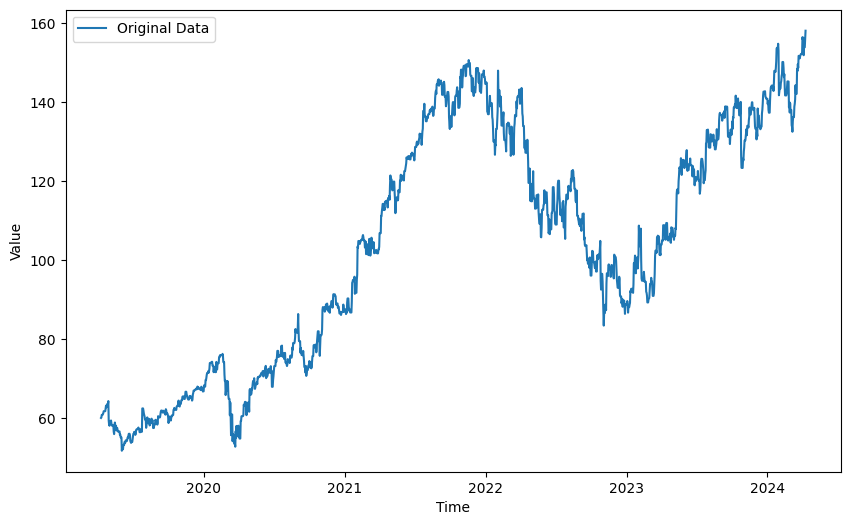

In [8]:
# Plot the data and identify any unusual observations
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts.values, label='Original Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [9]:
# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model='additive')

In [10]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

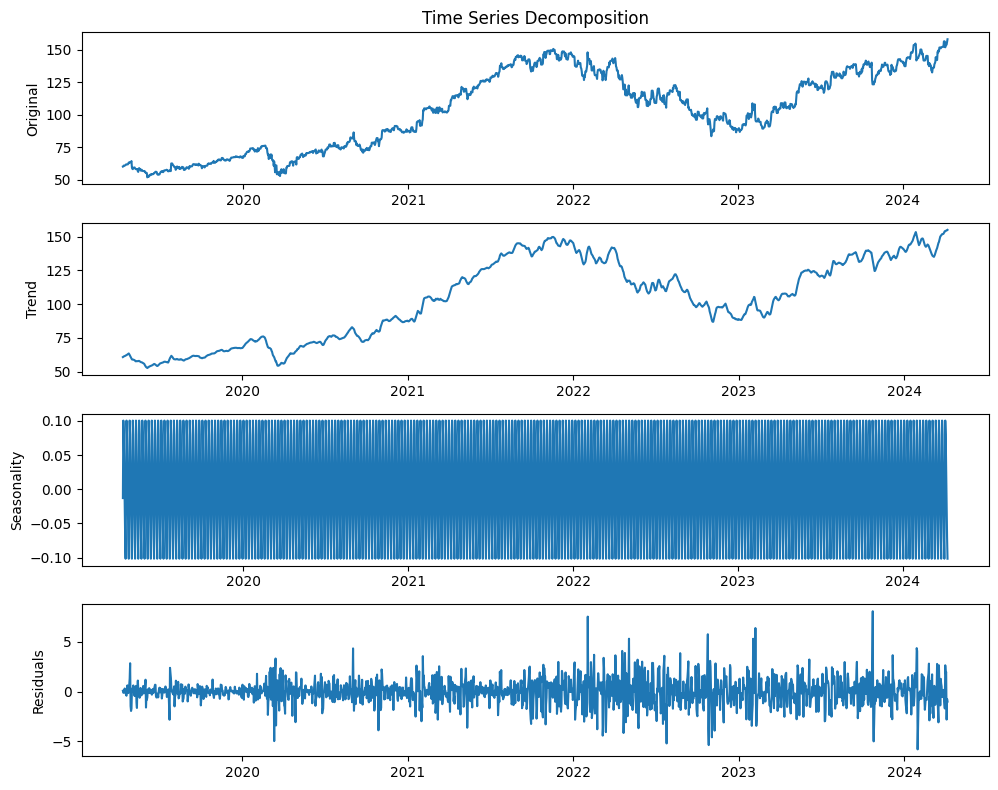

In [11]:
# Create subplots for each component
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

# Plot the original time series
axes[0].plot(ts, label='Original')
axes[0].set_ylabel('Original')

# Plot the trend component
axes[1].plot(trend, label='Trend')
axes[1].set_ylabel('Trend')

# Plot the seasonal component
axes[2].plot(seasonal, label='Seasonality')
axes[2].set_ylabel('Seasonality')

# Plot the residuals component
axes[3].plot(residuals, label='Residuals')
axes[3].set_ylabel('Residuals')

# Add titles and legends
axes[0].set_title('Time Series Decomposition')
plt.tight_layout()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller (ADF) Test
result = adfuller(ts)

# Extract p-value from the result
p_value = result[1]

print(p_value)

0.8373270813086409


In [13]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.4 MB/s eta 0:00:00


In [14]:
from pmdarima.arima.utils import ndiffs

In [15]:
ndiffs(ts, test="adf")

1

In [16]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller (ADF) Test
result = adfuller(ts.Close.diff().dropna())

# Extract p-value from the result
p_value = result[1]

print(p_value)

5.344499065519411e-22


In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

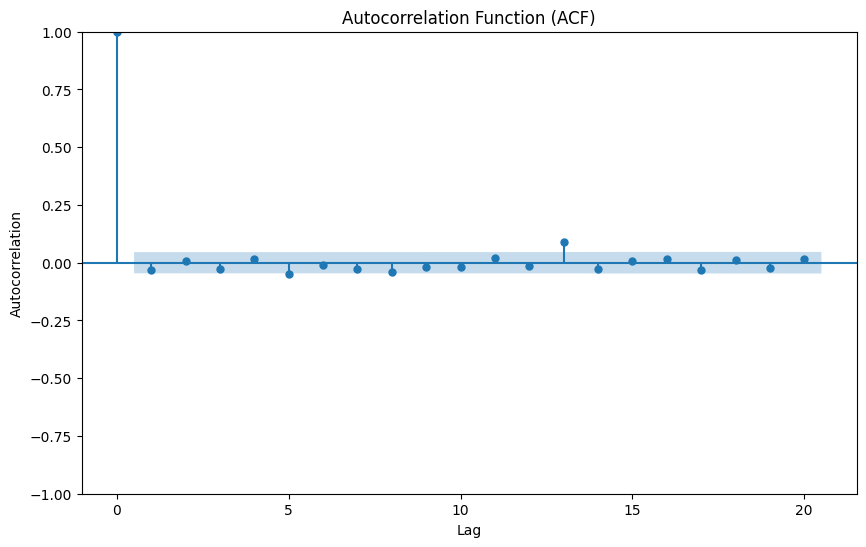

In [18]:
# Plot ACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(ts.Close.diff().dropna(), lags=20, ax=ax)  # Specify the number of lags to display
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

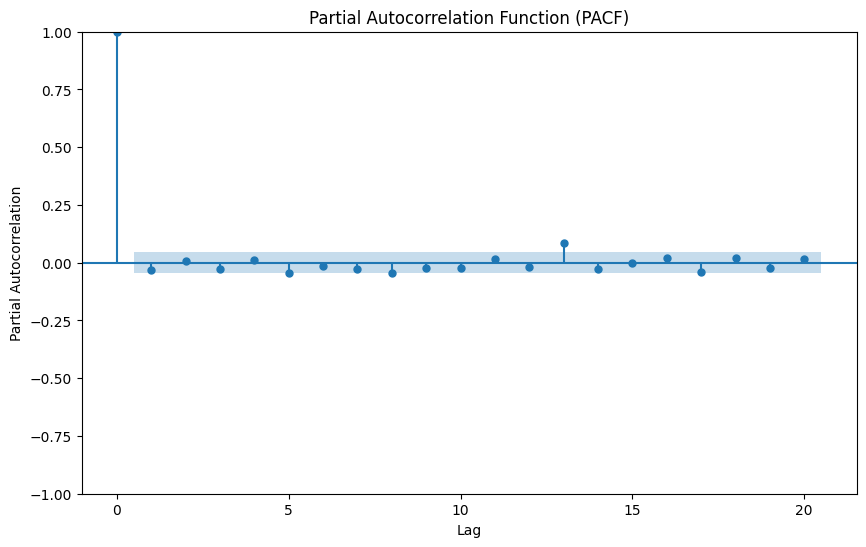

In [19]:
# Plot PACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(ts.Close.diff().dropna(), lags=20, ax=ax)  # Specify the number of lags to display
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [20]:
# train/test split
ts_train = ts.iloc[:int(ts.size * .8)]
ts_test = ts.iloc[int(ts.size * .8):]

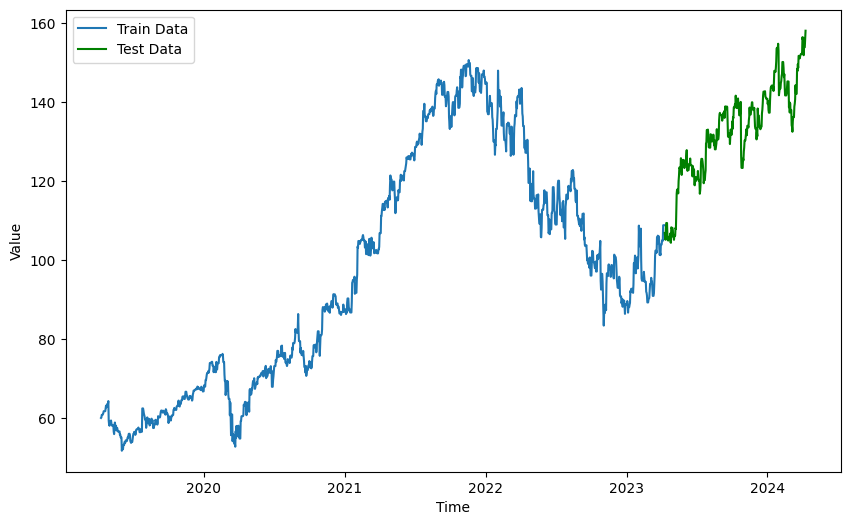

In [21]:
# Plot the data and identify any unusual observations
plt.figure(figsize=(10, 6))
plt.plot(ts_train.index, ts_train.values, label='Train Data')
plt.plot(ts_test.index, ts_test.values, 'green', label='Test Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [22]:
import pmdarima as pm

In [23]:
# Fit the ARIMA model
model = pm.auto_arima(ts_train, seasonal=True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1461
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2804.443
Date:                Wed, 10 Apr 2024   AIC                           5610.886
Time:                        02:53:50   BIC                           5616.172
Sample:                    04-10-2019   HQIC                          5612.858
                         - 04-09-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.7287      0.052     52.428      0.000       2.627       2.831
===================================================================================
Ljung-Box (L1) (Q):                   3.32   Jarque-Bera (JB):              1867.47
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               3.92   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(ts_train.values, order=(0, 1, 1))  # Replace p, d, q with appropriate values
model = model.fit()

(array([5.95436428e-03, 1.33533940e-01, 3.02598840e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.76125292e-05]),
 array([-10.01237144,  -3.00033412,   4.01170319,  11.02374051,
         18.03577782,  25.04781514,  32.05985245,  39.07188976,
         46.08392708,  53.09596439,  60.10800171]),
 <BarContainer object of 10 artists>)

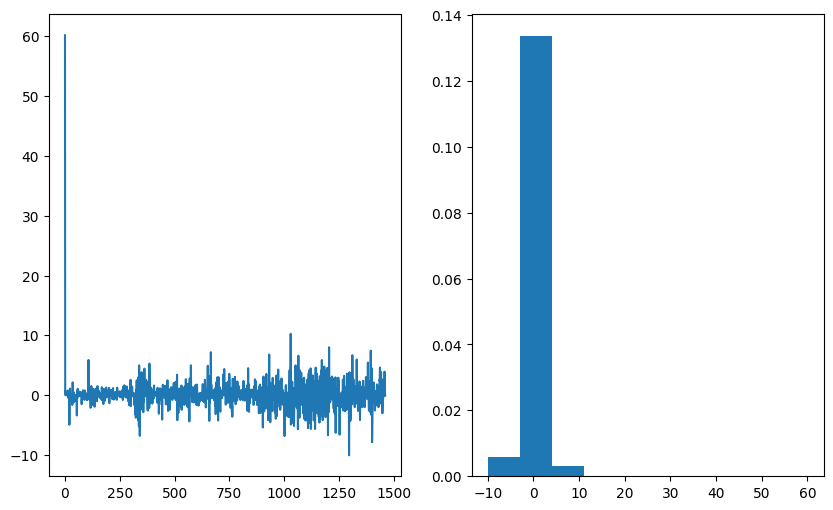

In [25]:
residuals = pd.DataFrame(model.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [40]:
# Forecast
forecast_steps = int(ts.size) - int(ts.size * .8)  # Number of future time steps to forecast

In [27]:
forecast = model.forecast(steps=forecast_steps)

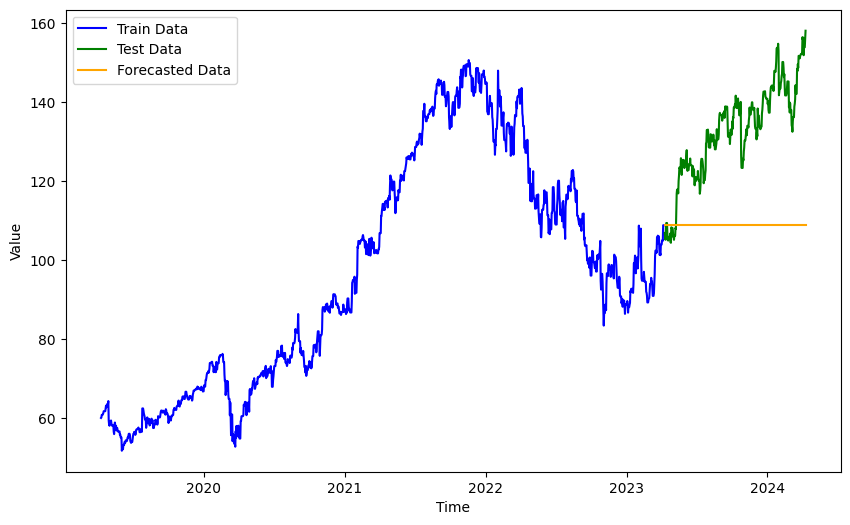

In [28]:
# Plot the data and identify any unusual observations
plt.figure(figsize=(10, 6))
plt.plot(ts_train.index, ts_train.values, 'blue', label='Train Data')
plt.plot(ts_test.index, ts_test.values, 'green', label='Test Data')
plt.plot(ts_test.index, forecast, 'orange', label='Forecasted Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

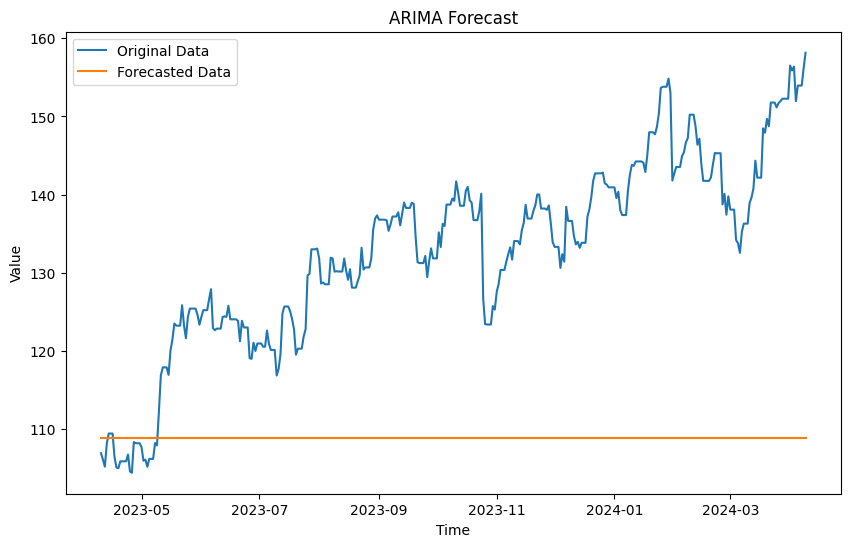

In [29]:
# Plot the original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ts_test.index, ts_test.values, label='Original Data')
plt.plot(ts_test.index, forecast, label='Forecasted Data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.show()

In [31]:
ts_test

,Close
Date,
2023-04-10,106.949997
2023-04-11,106.120003
2023-04-12,105.220001
2023-04-13,108.190002
2023-04-14,109.459999
...,...
2024-04-05,153.940002
2024-04-06,153.940002
2024-04-07,153.940002


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate predictions for the test data
forecast_steps = len(ts_test)
forecast = model.forecast(steps=forecast_steps)

# Compute accuracy metrics
mae = mean_absolute_error(ts_test, forecast)
mse = mean_squared_error(ts_test, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 24.161860518759028
Mean Squared Error (MSE): 711.0310416030991
Root Mean Squared Error (RMSE): 26.66516532112822


In [35]:
print("Length of ts_test:", len(ts_test))
print("Length of forecast:", len(forecast))

Length of ts_test: 366
Length of forecast: 366


In [36]:
print("Data type of ts_test:", type(ts_test))
print("Data type of forecast:", type(forecast))
print("ts_test values:", ts_test)
print("forecast values:", forecast)

Data type of ts_test: <class 'pandas.core.frame.DataFrame'>
Data type of forecast: <class 'numpy.ndarray'>
ts_test values:                  Close
Date                  
2023-04-10  106.949997
2023-04-11  106.120003
2023-04-12  105.220001
2023-04-13  108.190002
2023-04-14  109.459999
...                ...
2024-04-05  153.940002
2024-04-06  153.940002
2024-04-07  153.940002
2024-04-08  156.139999
2024-04-09  158.139999

[366 rows x 1 columns]
forecast values: [108.8999805 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805
 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805
 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805
 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805
 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805
 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805
 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805 108.8999805
 108.8999805 108.8999805 1

In [37]:
# Convert DataFrame to NumPy array
ts_test_values = ts_test['Close'].values

# Calculate absolute percentage errors
abs_percentage_errors = np.abs((ts_test_values - forecast) / ts_test_values)

# Calculate MAPE
mape = np.mean(abs_percentage_errors) * 100

print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 17.559102311783292
